<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classical-Goemans-Williamson-times" data-toc-modified-id="Classical-Goemans-Williamson-times-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classical Goemans-Williamson times</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cartesian_explorer import Explorer
import cartesian_explorer as caex

import qtensor
import time

import socket

In [2]:
cache = caex.caches.JobLibCache("../caex_cache/energy_eff")
if socket.gethostname().startswith('skylake'):
    print('Using ray parallel for caex')
    parallel = caex.parallels.Ray(processes=55)
else:
    parallel = None
ex = Explorer(cache=cache, parallel=parallel)

## Classical Goemans-Williamson times

In [3]:
@ex.provider
def graph(N, seed=10):
    return qtensor.toolbox.random_graph(nodes=N, seed=seed, degree=3)

@ex.provider
def classical_time_gw(graph):
    start = time.time()
    c = qtensor.tools.maxcut.goemans_williamson.gw_cost(graph)
    return time.time() - start
    

In [12]:
import xarray as xar

gw_max_N = 280
seeds = [10, 11, 12]
x_gw = np.array(range(10, gw_max_N, 18))

In [13]:
gw_time = ex.map_variable(('classical_time_gw')
                          , N=x_gw
                          , seed=seeds
                 )
x_ext = np.arange(10, 3400, 12)
gw = xar.DataArray(gw_time, dims=('N', 'seed'), coords=(x_gw, seeds))

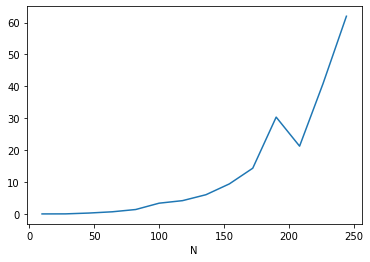

In [11]:
# check the data
gw.mean('seed').plot()

In [8]:
gw.to_netcdf('../gw_times.nc')